# SVM with Soft-margin

In [2]:
from cvxopt import matrix
from cvxopt import solvers
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [6]:
def split_train(X1,y1,X2,y2):
    #we get fetch train-data from both positive and negative label
    #we get fetch 80 datas(1-80) from each of them
    X1_train = X1[:80]
    y1_train = y1[:80]
    
    X2_train = X2[:80]
    y2_train = y2[:80]
    
    #Tumpukan vertikal
    X_train = np.vstack((X1_train,X2_train))
    #tumpukan horizontal
    y_train = np.hstack((y1_train,y2_train))
    
    return X_train,y_train

In [12]:
def linear_kernel(X1, X2):
    return np.dot(X1, X2)


In [13]:
mean1_2 = np.array([2,4])
mean2_2 = np.array([1,0])
cov2 = np.array([[1,-0.4],[-0.4,1]])

x1_2 = np.random.multivariate_normal(mean1_2,cov2,100)
y1_2 = np.ones(len(x1_2))
x2_2 = np.random.multivariate_normal(mean2_2,cov2,100)
y2_2 = np.ones(len(x2_2))*-1

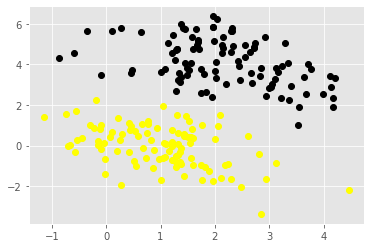

In [14]:
plt.plot(x1_2[:,0],x1_2[:,1],'o',color='black')
plt.plot(x2_2[:,0],x2_2[:,1],'o',color='yellow')

In [15]:
x_train_2,y_train_2 = split_train(x1_2,y1_2,x2_2,y2_2)


In [16]:
n_samples2 = x_train_2.shape[0]
K2 = np.zeros((n_samples2,n_samples2))

In [17]:

for i in range(n_samples2):
    for j in range(n_samples2):
        K2[i,j]= linear_kernel(x_train_2[i],x_train_2[j])

In [19]:
P2 = matrix(np.outer(y_train_2,y_train_2)*K2)

In [20]:
print(P2)

[ 1.95e+01  1.64e+01  2.71e+01  1.26e+01  2.47e+01  1.97e+01  1.40e+01 ... ]
[ 1.64e+01  1.41e+01  2.30e+01  8.81e+00  2.08e+01  1.58e+01  1.04e+01 ... ]
[ 2.71e+01  2.30e+01  3.79e+01  1.64e+01  3.44e+01  2.69e+01  1.86e+01 ... ]
[ 1.26e+01  8.81e+00  1.64e+01  1.62e+01  1.59e+01  1.62e+01  1.51e+01 ... ]
[ 2.47e+01  2.08e+01  3.44e+01  1.59e+01  3.13e+01  2.49e+01  1.77e+01 ... ]
[ 1.97e+01  1.58e+01  2.69e+01  1.62e+01  2.49e+01  2.14e+01  1.67e+01 ... ]
[ 1.40e+01  1.04e+01  1.86e+01  1.51e+01  1.77e+01  1.67e+01  1.46e+01 ... ]
[ 1.34e+01  1.06e+01  1.82e+01  1.16e+01  1.70e+01  1.48e+01  1.18e+01 ... ]
[ 1.67e+01  1.27e+01  2.23e+01  1.66e+01  2.11e+01  1.94e+01  1.64e+01 ... ]
[ 2.34e+01  2.09e+01  3.34e+01  9.60e+00  2.98e+01  2.13e+01  1.27e+01 ... ]
[ 1.25e+01  9.80e+00  1.70e+01  1.14e+01  1.59e+01  1.41e+01  1.15e+01 ... ]
[ 2.56e+01  2.05e+01  3.50e+01  2.14e+01  3.25e+01  2.80e+01  2.20e+01 ... ]
[ 2.41e+01  2.01e+01  3.34e+01  1.59e+01  3.05e+01  2.45e+01  1.76e+01 ... ]

In [21]:
P2.size

(160, 160)

In [22]:
A2 = matrix(y_train_2,(1,n_samples2),'d')
print(A2)

[ 1.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00 ... ]



In [23]:
q2 = matrix(np.ones(n_samples2)*-1)
print(q2)

[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.

In [24]:
b2 = matrix(0.0)
print(b2)

[ 0.00e+00]



In [25]:
C = 5

if C is None or C==0:
    G = matrix(np.diag(np.ones(n_samples2)*-1))
    h = matrix(np.zeros(n_samples2))
    
else:
    temp1_1 = np.diag(np.ones(n_samples2)*-1)
    temp2_1 = np.identity(n_samples2)
    G = matrix(np.vstack((temp1_1,temp2_1)))
    temp1_2 = np.zeros(n_samples2)
    temp2_2 = np.ones(n_samples2)*C
    h = matrix(np.hstack((temp1_2,temp2_2)))

In [26]:
solution2 = solvers.qp(P2,q2,G,h,A2,b2)

     pcost       dcost       gap    pres   dres
 0: -6.3595e+01 -2.8139e+03  8e+03  9e-01  7e-14
 1: -2.8690e+01 -7.2151e+02  1e+03  9e-02  5e-14
 2: -1.3501e+00 -1.1289e+02  2e+02  1e-02  4e-14
 3:  2.0548e+00 -1.2752e+01  2e+01  6e-04  2e-14
 4: -5.3914e-01 -5.4482e+00  5e+00  2e-04  7e-15
 5: -2.1146e+00 -4.7686e+00  3e+00  5e-05  8e-15
 6: -3.2040e+00 -3.2736e+00  7e-02  1e-06  1e-14
 7: -3.2282e+00 -3.2289e+00  7e-04  1e-08  1e-14
 8: -3.2284e+00 -3.2284e+00  7e-06  1e-10  1e-14
 9: -3.2284e+00 -3.2284e+00  7e-08  1e-12  1e-14
Optimal solution found.


In [27]:
alpha_2 = np.ravel(solution2['x'])

In [28]:
w_2 = np.dot(np.ravel(matrix(y_train_2*alpha_2)),x_train_2)

In [29]:
print(w_2)

[1.21558512 2.23140055]


In [30]:
S_2 = (alpha_2>1e-1).flatten()

In [31]:
S_2

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [32]:
y_train_2[S_2]

array([ 1.,  1., -1.])

In [33]:
x_train_2[S_2]

array([[ 1.94222735,  2.38287892],
       [-0.10434607,  3.497777  ],
       [ 1.04531558,  1.97518546]])

In [35]:
b_2 = y_train_2[S_2] - np.dot(x_train_2[S_2],w_2)

In [36]:
b_2

array([-6.67810001, -6.67810001, -6.67810001])

in here, we just show how to calculate in term of soft-margin because most explanation are already explained in SVM-hard-margin